# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**2301ACDS_TeamES1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents


<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading The Data</a>

<a href=#four>4. Exploratory Data Analysis</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Model Training and Evaluation</a>

<a href=#seven>7. Test Data Preparation and Submission</a>

<a href=#eight>8. Saving Models for Streamlit Appilication</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. Recommendation</a>
    
<a href=#eleven>11. Reference Links</a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


 <a id="one"></a>
## 1. Introduction 
<a href=#cont>Back to Table of Contents</a>

<a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

Python libraries are pre-written code modules that provide a wide range of functionalities, allowing developers to easily incorporate specific features into their Python projects. These libraries serve as powerful tools that simplify complex tasks, promote code reuse, and enhance productivity. Here's a brief summary of some popular Python libraries we will be using:

- **NumPy**: NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to perform operations efficiently.

- **Pandas**: Pandas is a versatile library for data manipulation and analysis. It introduces the DataFrame data structure, which enables easy handling and manipulation of structured data, such as CSV files or database tables.

- **Matplotlib**: Matplotlib is a comprehensive plotting library that allows the creation of static, animated, and interactive visualizations. It provides a wide variety of plots, including line plots, bar charts, scatter plots, histograms, and more.

- **Scikit-learn**: Scikit-learn is a powerful machine learning library that provides a wide range of algorithms and tools for tasks such as classification, regression, clustering, and dimensionality reduction. It also offers utilities for model evaluation and data preprocessing.


In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import offsetbox
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import cufflinks as cf
import re
import scipy as sp
import difflib
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import surprise    # Run "!pip install surprise" on new cell to download
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import accuracy
import plotly.express as px
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

from time import time    # Import time to measure algorithm runtime

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import mean_squared_error

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
 
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
# df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
# df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')
# df_sample = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv')
# df_gscores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')
# df_gtags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')
# df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
# df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')
# df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
# df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')

In [4]:
df_train = pd.read_csv('./s3-drive/train.csv')
df_test = pd.read_csv('./s3-drive/test.csv')
df_gscores = pd.read_csv('./s3-drive/genome_scores.csv')
df_gtags = pd.read_csv('./s3-drive/genome_tags.csv')
df_imdb = pd.read_csv('./s3-drive/imdb_data.csv')
df_links = pd.read_csv('./s3-drive/links.csv')
df_movies = pd.read_csv('./s3-drive/movies.csv')
df_tags = pd.read_csv('./s3-drive/tags.csv')

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [7]:
df_tags.head()

In [8]:
df_gtags.head()

In [9]:
df_links.head()

In [10]:
df_gscores.head()

In [11]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [12]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<a id="four"></a>
## 4. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

## Reading the shape for all dfs

In [15]:
list_dataframes = [ df_movies, df_imdb, df_tags, df_links, df_gscores, df_gtags, df_train, df_test ]

for df in list_dataframes:
    print(df.shape)

(62423, 3)
(27278, 6)
(10000038, 4)
(5000019, 2)


From `8` Dataframes above, it is observed that:
- `Movies` has ~ **63 500** rows, and **3** columns
- `imdb` has ~ **27 300** rows, and **6** columns
- `tags` has ~ **1.1M** rows, and **4** columns
- `links` has ~ **62 300** rows, and **3** columns
- `genome_scores` has ~ **15.6M** rows, and **3** columns
- `genome_tags` has ~ **1100** rows, and **2** columns
- `train` has ~ **10M** rows, and **4** columns
- `test` has ~ **5M** rows, and **2** columns

### Checking for null values in each dataframe

In [16]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [19]:
# df_tags.isnull().sum()

In [20]:
# df_links.isnull().sum()

In [21]:
# df_gscores.isnull().sum()

In [22]:
# df_gtags.isnull().sum()

In [23]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [24]:
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

### From above, it is observed that:
- the `imdb` dataframe has a significant number of null values within the data set. 
- the `tags` dataframe has a low number of null values.
- the `links` dataframe has a low number of null values.

### Visualizing the `imdb` dataframe which has a significant number of null values.

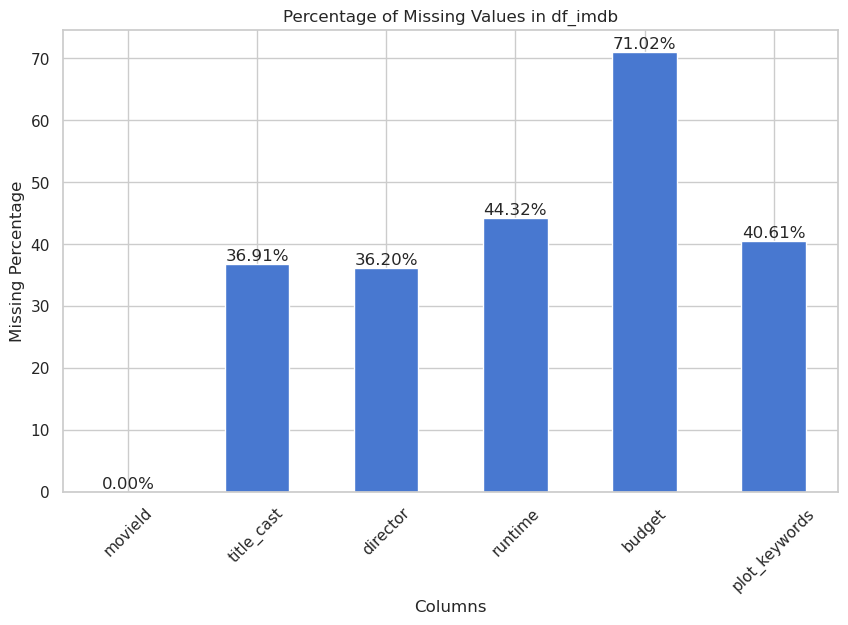

In [25]:
# view percentage of missing values 
missing_values = df_imdb.isnull().sum()
missing_percentage = (missing_values / len(df_imdb)) * 100

# Plotting the missing percentage
plt.figure(figsize=(10, 6))
ax = missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values in df_imdb')
plt.xticks(rotation=45)

# Display actual percentage values on top of each bar
for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### The Budget column will be dropped since it has over **70%** of missing data.

---
## Univariate Analysis

### 1. Ratings Analysis

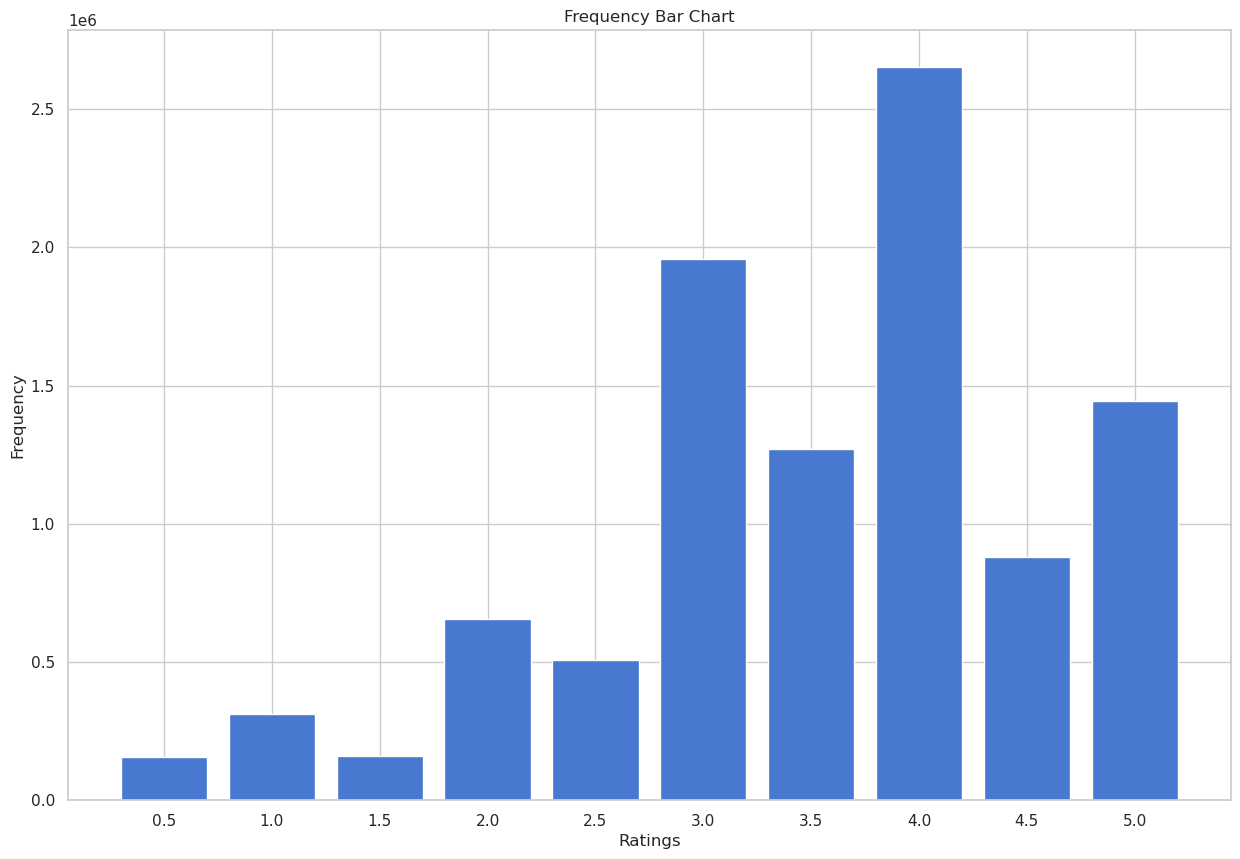

In [26]:
# Count the frequencies
values, counts = np.unique(df_train['rating'], return_counts=True)

# Create a bar chart
plt.bar(values, counts, width=0.4, align='center')

# Set x-axis tick positions and labels
plt.xticks(np.arange(0.5, max(values)+0.5, 0.5))


# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart')

# Show the bar chart
plt.show()

In [24]:
# creating extracting the year from our movie titles column
df_movies['year'] = df_movies['title'].str.extract('\((\d{4})\)', expand=True)

# fill the missing data in the year column with the most common year
mode_movie = df_movies.year.mode()[0]
df_movies['year'].fillna(mode_movie, inplace=True)

# change year to an integer
df_movies['year'] = df_movies['year'].astype('int')
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [25]:
# merge the train dataframe with the movies dataframe
merged_movies = df_train.merge(df_movies, how='inner', on='movieId')
merged_movies.head()

,userId,movieId,rating,timestamp,title,genres,year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008


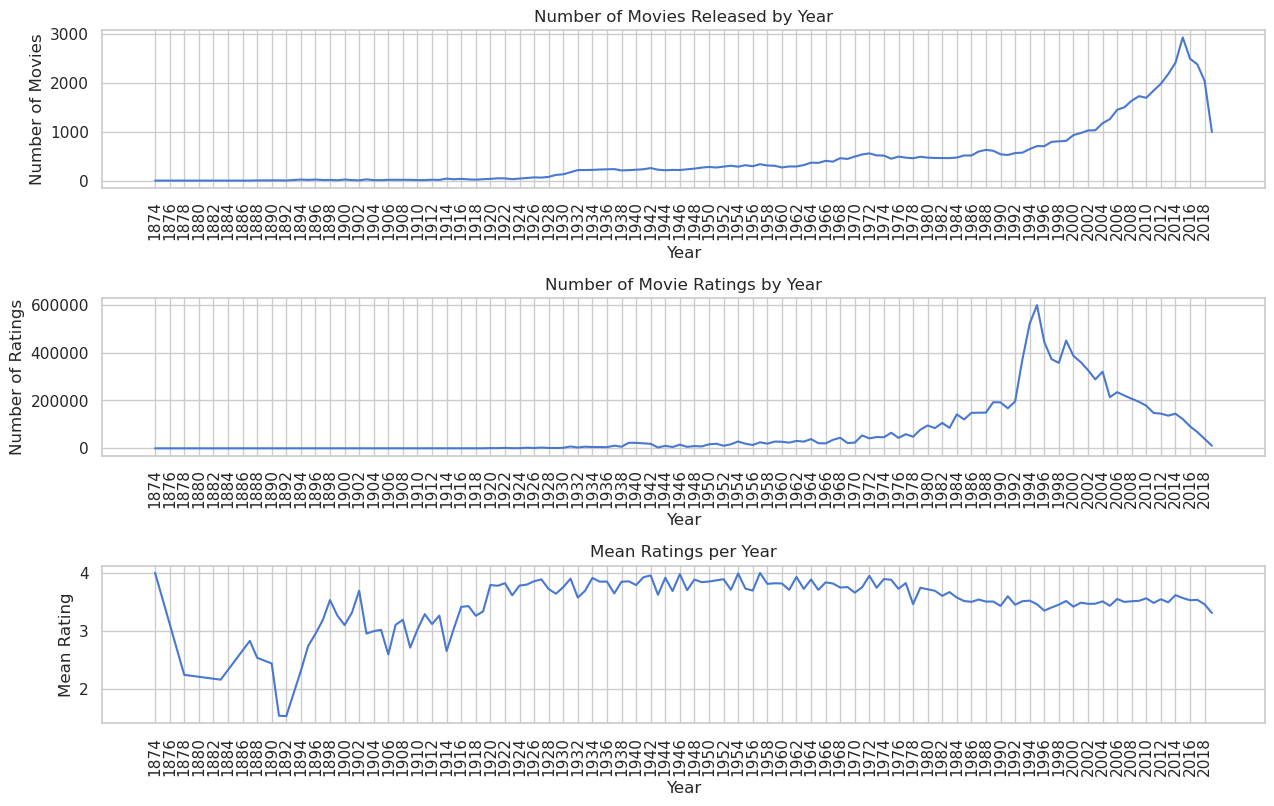

In [26]:
# plot average ratings per year
# Calculate the average ratings per year
average_ratings = merged_movies.groupby('year')['rating'].mean()

# Calculate the number of movies released by year
movies_per_year = df_movies.groupby('year').size()

# Calculate the number of ratings per year
ratings_per_year = merged_movies.groupby('year').size()

# Create subplots for number of movies and mean ratings side by side
fig, axes = plt.subplots(3, 1, figsize=(15, 9))

# Plot number of movies released by year
axes[0].plot(movies_per_year.index, movies_per_year.values)
axes[0].set_xticks(np.arange(min(movies_per_year.index), max(movies_per_year.index)+1, 2))
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies Released by Year')

# Plot number of ratings by year
axes[1].plot(ratings_per_year.index, ratings_per_year.values)
axes[1].set_xticks(np.arange(min(ratings_per_year.index), max(ratings_per_year.index)+1, 2))
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Number of Movie Ratings by Year')

# Plot mean ratings per year
axes[2].plot(average_ratings.index, average_ratings.values)
axes[2].set_xticks(np.arange(min(movies_per_year.index), max(movies_per_year.index)+1, 2))
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Mean Rating')
axes[2].set_title('Mean Ratings per Year')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.7);

The plot "Number of Movies Released by Year" illustrates the count of movies released over the years. The data reveals a sparse number of movies released before 1930, indicating a limited presence during that period. Subsequently, there is a consistent upward trend in the number of movies released each year, reaching its peak in 2015. Following this peak, there is a gradual decline in movie releases year after year. This pattern suggests a significant increase in movie production over time, followed by a gradual decrease in recent years.

The number of ratings plot depicting the number of ratings provides insights into the minimal number of ratings for movies before 1930. This scarcity of ratings during that period helps explain the extreme variations in movie ratings observed for years within this timeframe. The limited quantity of ratings contributes to the higher likelihood of encountering both high and low ratings for movies released during this period. Furthermore, the plot highlights a significant decline in the number of ratings for movies released after 2000. This decline suggests a diminishing trend in the number of movie ratings during more recent years.

The plot depicting the average movie ratings over the years does not exhibit a distinct trend. The maximum average rating observed is 4.0, which is reached in multiple years as evident from the line plot. Furthermore, it can be observed that the ratings in years since 2000 have remained below this peak rating, hovering around 3.5. This suggests that the average movie ratings have generally remained lower in recent years compared to the peak rating achieved in previous years

---
### 2. Genres Analysis 

### We will analyse the Genres we have in the dataset

In [27]:
# Create dataframe containing only the movieId and genres
movies_genres_split = pd.DataFrame(df_movies[['movieId', 'genres']],columns=['movieId', 'genres'])

# Splitting the genres seperated by "|". Movie-genre combinations are stored as a list
movies_genres_split.genres = movies_genres_split.genres.apply(lambda x: x.split('|'))

# Creating the expanded dataframe where each movie-genre combination is in a seperate row
movies_genres_split = pd.DataFrame([(x.movieId, d) for x in movies_genres_split.itertuples() for d in x.genres],
                             columns=['movieId', 'genres'])

In [28]:
movies_genres_split.head(10)

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


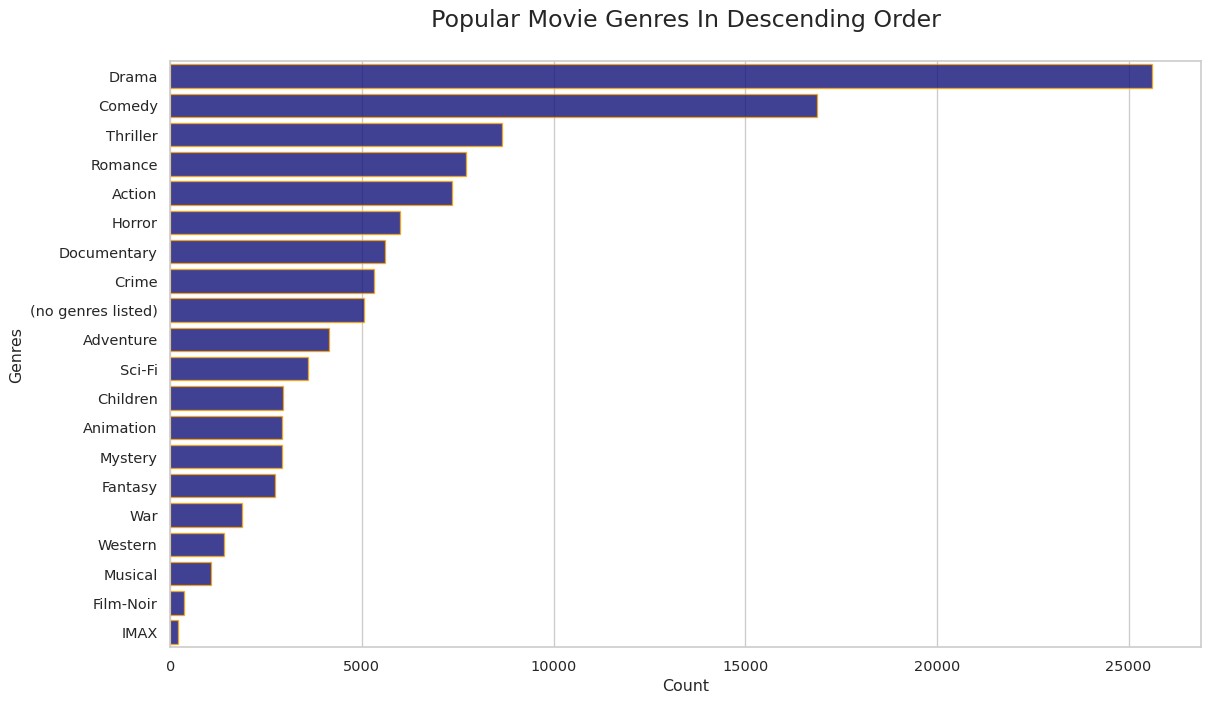

In [29]:
# Ploting the genres in descending order
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres In Descending Order\n', fontsize=18)
sns.countplot(y="genres", data=movies_genres_split,order=movies_genres_split['genres']
              .value_counts(ascending=False).index, color='darkblue', ec= 'orange', alpha=0.8)
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

### From above, it is observed that:
- We have a total of **19** Different Genres.

---
### 3. Director, Actor Analysis

<a id="five"></a>
## 5. Data Engineering
<a href=#cont>Back to Table of Contents</a>


Feature engineering is a crucial step in the process of building machine learning models. It involves transforming raw data into a format that is more suitable and informative for the specific task at hand. By creating new features or modifying existing ones, feature engineering aims to extract relevant information and enhance the predictive power of the model.

### For analysis purpose, We will merge the `movies`, `imbd`, and `train` Dataframes together where `movieId` in one Dataframe is the same as the `movieId` in the other Dataframe

In [31]:
imdb_movies = pd.merge(df_movies,df_imdb, on="movieId")
df = imdb_movies.merge(df_train, on="movieId")
df

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,27431,5.0,849667827
...,...,...,...,...,...,...,...,...,...,...,...,...
9633026,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,33844,2.5,1436135246
9633027,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,51278,3.0,1434134840
9633028,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,73268,1.0,1475289253
9633029,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,7865,1.0,1456452588


## Collaborative Based Filtering

In [27]:
reader = Reader(rating_scale=(0.5, 5))
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [28]:
df_test.shape, df_train.shape

((5000019, 2), (10000038, 4))

In [29]:
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.20, random_state=42)

 <a id="six"></a>
## 6. Model Training and Evaluation
<a href=#cont>Back to Table of Contents</a>

### Model 1: Singular Value Decomposition
Singular value decomposition (SVD) is a collaborative filtering method for movie recommendation.

In [ ]:
svd_model = SVD(n_epochs=35,n_factors=400,init_std_dev=0.001,random_state=42,verbose=True)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30


 <a id="seven"></a>
## 7. Test Data Prediction and Submission
<a href=#cont>Back to Table of Contents</a>


In [42]:
# Creating a submission file for the SVD model
pred = [svd_model.predict(df_test.userId[i], df_test.movieId[i]).est for i in df_test.index]
predictions = pd.DataFrame(pred)
predictions['Id'] = df_test['userId'].astype(str)+'_'+df_test['movieId'].astype(str)
submission = pd.DataFrame()
submission['Id']=predictions['Id']
submission['rating']=predictions[0]
submission.to_csv('submission.csv', index=False)

In [43]:
my_sub = pd.read_csv('/kaggle/working/submission.csv')
my_sub.head(5)

,Id,rating
0,1_2011,3.091483
1,1_4144,4.109224
2,1_5767,3.622078
3,1_6711,4.082091
4,1_7318,2.788490


 <a id="eight"></a>
## 8. Saving Models for Streamlit Appilication
<a href=#cont>Back to Table of Contents</a>

 <a id="nine"></a>
## 9. Conclusion
<a href=#cont>Back to Table of Contents</a>

 <a id="ten"></a>
## 10. Recommendations
<a href=#cont>Back to Table of Contents</a>

 <a id="eleven"></a>
## 11. Reference Links
<a href=#cont>Back to Table of Contents</a>